In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.50533266579678

In [3]:
from sklearn.neural_network import MLPClassifier
iris = load_iris(as_frame=False)

X_train, X_valid, y_train, y_valid = train_test_split(iris.data, iris.target, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[5], random_state=42))])

In [4]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.868421052631579

In [5]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

2024-04-25 09:26:15.779429: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 09:26:15.804836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
len(X_train), len(X_valid), len(X_test)

(55000, 5000, 10000)

In [8]:
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [9]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. 

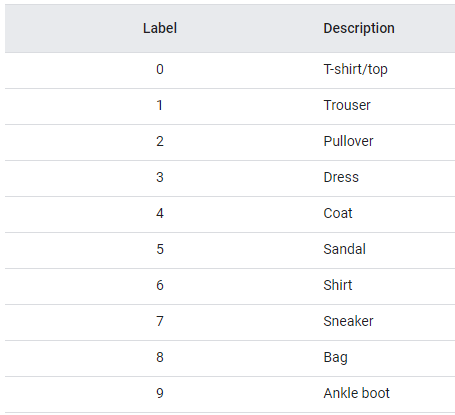

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-04-25 09:26:17.123665: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-25 09:26:17.130789: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-25 09:26:17.134446: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [12]:
tf.keras.backend.clear_session()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[-0.06492911, -0.04931739,  0.02371331, ...,  0.00133651,
         -0.00483275,  0.02098276],
        [-0.03854313,  0.05533262,  0.03490462, ..., -0.0229072 ,
         -0.00320452,  0.04174426],
        [-0.05164607,  0.07066698, -0.02875517, ...,  0.06220667,
          0.02156861,  0.05180851],
        ...,
        [-0.01120399,  0.02218354, -0.07219612, ..., -0.04487421,
          0.04303734, -0.02879678],
        [ 0.00762313,  0.06608066, -0.02645352, ..., -0.04320696,
         -0.06440519,  0.05130987],
        [ 0.00656088, -0.07285442, -0.03480358, ..., -0.01590202,
         -0.02289476,  0.05948856]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - accuracy: 0.9585 - loss: 0.1292 - val_accuracy: 0.8868 - val_loss: 0.3577
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.9591 - loss: 0.1268 - val_accuracy: 0.8858 - val_loss: 0.3589
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.9602 - loss: 0.1244 - val_accuracy: 0.8876 - val_loss: 0.3626
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9603 - loss: 0.1221 - val_accuracy: 0.8864 - val_loss: 0.3619
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.9620 - loss: 0.1197 - val_accuracy: 0.8878 - val_loss: 0.3673
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.9631 - loss: 0.1174 - val_accuracy: 0.8860 - val_loss: 0.3643
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9634 - loss: 0.1151 - val_accuracy: 0.8850 - val_loss: 0.3734
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.9643 -

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


<Axes: xlabel='Epoch'>

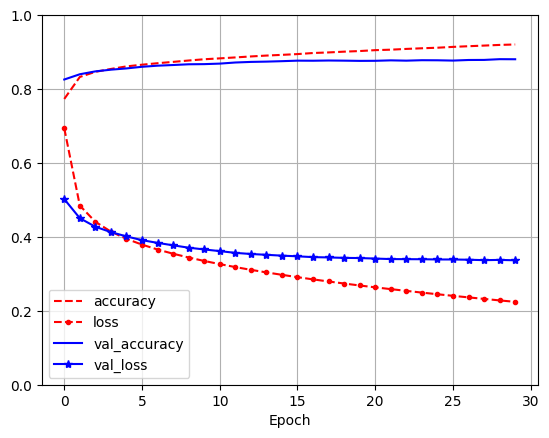

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(ylim=[0,1], grid=True, xlabel="Epoch", style = ["r--", "r--.", "b-", "b-*"])

In [28]:
model.evaluate(X_test, y_test)

251/313 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.8843 - loss: 0.4675

I0000 00:00:1714038291.641385   35796 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_35', 4 bytes spill stores, 4 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8845 - loss: 0.4633


[0.4442152678966522, 0.8853999972343445]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer, loss="mse", metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.2099 - loss: 1.5772 - val_RootMeanSquaredError: 0.6153 - val_loss: 0.3785
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - RootMeanSquaredError: 0.6313 - loss: 0.3990 - val_RootMeanSquaredError: 0.5989 - val_loss: 0.3586
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - RootMeanSquaredError: 0.6018 - loss: 0.3623 - val_RootMeanSquaredError: 0.6298 - val_loss: 0.3965
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - RootMeanSquaredError: 0.5873 - loss: 0.3450 - val_RootMeanSquaredError: 0.6721 - val_loss: 0.4516
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - RootMeanSquaredError: 0.5805 - loss: 0.3370 - val_RootMeanSquaredError: 0.6201 - val_loss: 0.3844
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - RootMeanSquaredError: 0.5708 - loss: 0.3259 - val_RootMeanSquaredError: 0.5547 - val_loss: 0.3076
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - RootMeanSquaredError: 0.5636 - lo

In [35]:
rmse_test

0.5343929529190063

In [37]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)
                                    
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])                                    
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer, loss="mse", metrics=["RootMeanSquaredError"])

norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 175.0728 - loss: 40825.7109 - val_RootMeanSquaredError: 14.5290 - val_loss: 210.9883
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - RootMeanSquaredError: 3.8117 - loss: 14.5484 - val_RootMeanSquaredError: 13.7992 - val_loss: 190.3227
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - RootMeanSquaredError: 3.3553 - loss: 11.2788 - val_RootMeanSquaredError: 12.9560 - val_loss: 167.7755
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - RootMeanSquaredError: 2.9043 - loss: 8.4561 - val_RootMeanSquaredError: 12.0721 - val_loss: 145.6616
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - RootMeanSquaredError: 2.4961 - loss: 6.2545 - val_RootMeanSquaredError: 11.1521 - val_loss: 124.3074
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - RootMeanSquaredError: 2.1578 - loss: 4.6809 - val_RootMeanSquaredError: 10.2248 - val_loss: 104.4947
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/ste

In [38]:
rmse_test

0.9699609875679016

In [46]:
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    {"input_wide": X_train_wide, "input_deep": X_train_deep}, 
    y_train,
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), y_valid)
)
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.7074 - loss: 3.0341 - val_RootMeanSquaredError: 0.9663 - val_loss: 0.9335
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - RootMeanSquaredError: 0.7710 - loss: 0.5952 - val_RootMeanSquaredError: 0.9072 - val_loss: 0.8228
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - RootMeanSquaredError: 0.6866 - loss: 0.4715 - val_RootMeanSquaredError: 1.2243 - val_loss: 1.4983
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - RootMeanSquaredError: 0.6492 - loss: 0.4217 - val_RootMeanSquaredError: 1.0881 - val_loss: 1.1834
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - RootMeanSquaredError: 0.6278 - loss: 0.3942 - val_RootMeanSquaredError: 1.1328 - val_loss: 1.2827
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - RootMeanSquaredError: 0.6178 - loss: 0.3818 - val_RootMeanSquaredError: 1.0357 - val_loss: 1.0722
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - RootMeanSquaredError: 

In [47]:
rmse_test

0.9699609875679016

In [51]:
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide")
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep")
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    {"input_wide": X_train_wide, "input_deep": X_train_deep}, 
    (y_train, y_train),
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)
mse_test = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - dense_47_RootMeanSquaredError: 1.6208 - dense_48_RootMeanSquaredError: 1.8162 - loss: 2.7884 - val_dense_47_RootMeanSquaredError: 0.8381 - val_dense_48_RootMeanSquaredError: 1.2193 - val_loss: 0.7807
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - dense_47_RootMeanSquaredError: 0.8025 - dense_48_RootMeanSquaredError: 0.9182 - loss: 0.6646 - val_dense_47_RootMeanSquaredError: 0.7226 - val_dense_48_RootMeanSquaredError: 0.9277 - val_loss: 0.5559
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - dense_47_RootMeanSquaredError: 0.7167 - dense_48_RootMeanSquaredError: 0.8044 - loss: 0.5272 - val_dense_47_RootMeanSquaredError: 0.6681 - val_dense_48_RootMeanSquaredError: 0.7703 - val_loss: 0.4610
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - dense_47_RootMeanSquaredError: 0.6721 - dense_48_RootMeanSquaredError: 0.7685 - loss: 0.4658 - val_dense_47_RootMeanSquaredError: 0.6412 - val_dense_48_RootMeanSquaredError: 0.73

In [52]:
y_pred

[array([[0.5859831],
        [1.3048791],
        [3.5586383]], dtype=float32),
 array([[0.7610394],
        [1.1920694],
        [3.320511 ]], dtype=float32)]

In [53]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

In [59]:
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), 
    (y_train, y_train),
    epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)
mse_test = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.5216 - RootMeanSquaredError_1: 1.5838 - loss: 2.4059 - val_RootMeanSquaredError: 1.0088 - val_RootMeanSquaredError_1: 1.5147 - val_loss: 1.1450
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - RootMeanSquaredError: 0.8323 - RootMeanSquaredError_1: 0.8993 - loss: 0.7052 - val_RootMeanSquaredError: 0.7411 - val_RootMeanSquaredError_1: 1.0653 - val_loss: 0.6076
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - RootMeanSquaredError: 0.7362 - RootMeanSquaredError_1: 0.7947 - loss: 0.5513 - val_RootMeanSquaredError: 0.6621 - val_RootMeanSquaredError_1: 0.8599 - val_loss: 0.4683
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - RootMeanSquaredError: 0.6834 - RootMeanSquaredError_1: 0.7527 - loss: 0.4773 - val_RootMeanSquaredError: 0.6328 - val_RootMeanSquaredError_1: 0.7579 - val_loss: 0.4177
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - RootMeanSquaredError: 0.6499 - RootMeanSquaredErro

In [62]:
model.save("my_keras_model.keras")